In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
import common
from common import *
import pandas as pd

### System preferences

In [2]:
%matplotlib inline 
os.chdir("../")
print(f"Root directory: {os.getcwd()}")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 10,
})

Root directory: c:\Users\andre\Dropbox\FYS-STK4155_projects\FYS-STK4155 - Project1\FYS-STK4155-Prj1_report


In [3]:
# Data input
np.random.seed(100)
n = 100
maxdegree = 20

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

Text(0.5, 1.0, 'Input data')

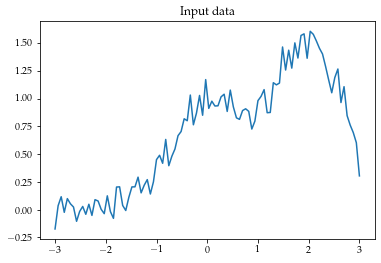

In [4]:
plt.figure()
plt.plot(x, y)
plt.title("Input data")

In [6]:
scale = False
y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()
X_train_df = pd.DataFrame()
X_test_df = pd.DataFrame()

for degree in range(1, maxdegree):
    X_train, X_test, y_train, y_test = prepare_data(x, y, 
                                                    degree, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    scale=scale)
    
    model = OLS() # Instansiate the model
    model.fit(X_train, y_train) # Training the model
   |
    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    X_train_df[f"Degree{degree}"] = X_train[:,1:2].flatten()
    y_train_df[f"Degree{degree}"] = y_train.flatten()
    y_hat_train_df[f"Degree{degree}"] = y_hat_train.flatten()
    
    X_test_df[f"Degree{degree}"] = X_test[:,1:2].flatten()
    y_test_df[f"Degree{degree}"] = y_test.flatten()
    y_hat_test_df[f"Degree{degree}"] = y_hat_test.flatten()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)

In [ ]:
mse_scores_train = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test = ((y_test_df - y_hat_test_df) ** 2).mean()

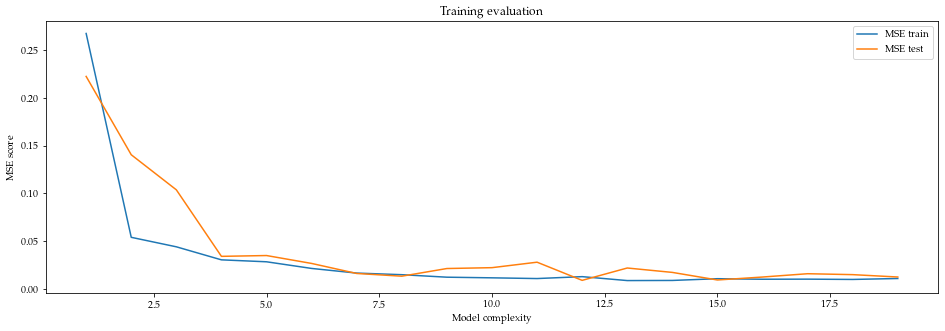

In [ ]:
x_plot = np.arange(1,maxdegree)
plt.figure(figsize=(16,5))
plt.plot(x_plot, mse_scores_train, label="MSE train")
plt.plot(x_plot, mse_scores_test, label="MSE test")
plt.xlabel("Model complexity")
plt.ylabel("MSE score")
plt.title("Training evaluation")
plt.legend()

In [ ]:
#print(y_train_df.mean())
#print(y_hat_train_df.mean())
#print(y_test_df.mean())
#print(y_hat_test_df.mean())

In [ ]:
#print(y_train_df.var())
#print(y_hat_train_df.var())
#print(y_test_df.var())
#print(y_hat_test_df.var())

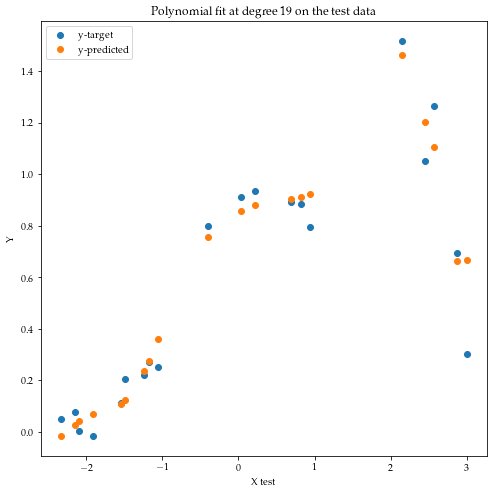

In [ ]:
degree = 19
plt.figure(figsize=(8,8))
plt.scatter(X_test_df[f"Degree{degree}"], y_test_df[f"Degree{degree}"], label="y-target")
plt.scatter(X_test_df[f"Degree{degree}"], y_hat_test_df[f"Degree{degree}"], label="y-predicted")
plt.xlabel("X test")
plt.ylabel("Y")
plt.title(f"Polynomial fit at degree {degree} on the test data")
plt.legend()

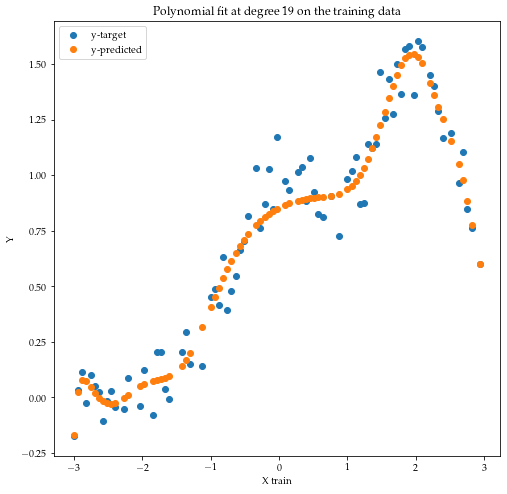

In [ ]:
degree = 19
plt.figure(figsize=(8,8))
plt.scatter(X_train_df[f"Degree{degree}"], y_train_df[f"Degree{degree}"], label="y-target")
plt.scatter(X_train_df[f"Degree{degree}"], y_hat_train_df[f"Degree{degree}"], label="y-predicted")
plt.xlabel("X train")
plt.ylabel("Y")
plt.title(f"Polynomial fit at degree {degree} on the training data")
plt.legend()